In [20]:
# image augmentation analysis
import tensorflow as tf

basemodel = tf.keras.models.load_model("models/basemodel.keras")
augmodel = tf.keras.models.load_model("models/augbasemodel.keras")

In [21]:
from module.dataloader import create_generators

data_dir = "data/"
_, val_gen = create_generators(
    data_dir,
    img_size=(224, 224),
    batch_size=16,
    val_split=0.2,
    augment=False 
)

Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.


In [22]:
print("Number of validation samples:", val_gen.samples)
print("Batch size:", val_gen.batch_size)
print("Steps per epoch:", np.ceil(val_gen.samples / val_gen.batch_size))

Number of validation samples: 8000
Batch size: 16
Steps per epoch: 500.0


In [23]:
import numpy as np

# Get true labels
true_labels = val_gen.classes
class_indices = list(val_gen.class_indices.keys())

# Base model predictions
base_preds = basemodel.predict(val_gen, verbose=1)
base_probs = base_preds[:, 1]  

# Augmented model predictions
aug_preds = augmodel.predict(val_gen, verbose=1)
aug_probs = aug_preds[:, 1]

500/500 ━━━━━━━━━━━━━━━━━━━━ 151s 299ms/step
500/500 ━━━━━━━━━━━━━━━━━━━━ 167s 331ms/step


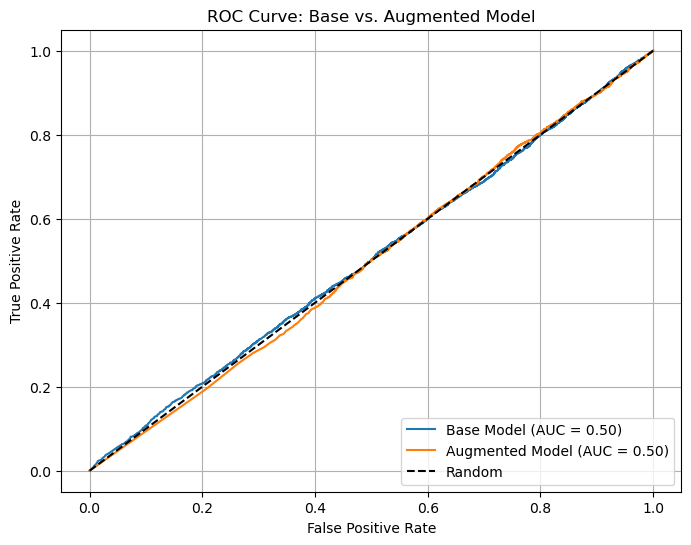

In [25]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr_base, tpr_base, _ = roc_curve(true_labels, base_probs)
roc_auc_base = auc(fpr_base, tpr_base)

fpr_aug, tpr_aug, _ = roc_curve(true_labels, aug_probs)
roc_auc_aug = auc(fpr_aug, tpr_aug)

plt.figure(figsize=(8, 6))
plt.plot(fpr_base, tpr_base, label=f"Base Model (AUC = {roc_auc_base:.2f})")
plt.plot(fpr_aug, tpr_aug, label=f"Augmented Model (AUC = {roc_auc_aug:.2f})")
plt.plot([0, 1], [0, 1], "k--", label="Random")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve: Base vs. Augmented Model")
plt.legend(loc="lower right")
plt.grid()
plt.show()

In [ ]:
# needs more granular analyses. end of augmentation tests.